<a href="https://colab.research.google.com/github/avijayant/SentimentClassificationExploration/blob/master/NLP_deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip


--2020-03-23 01:03:15--  https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84188 (82K) [application/x-httpd-php]
Saving to: ‘sentiment labelled sentences.zip’

sentiment labelled  100%[===================>]  82.21K  --.-KB/s    in 0.06s   

2020-03-23 01:03:15 (1.28 MB/s) - ‘sentiment labelled sentences.zip’ saved [84188/84188]



In [2]:
from zipfile import ZipFile
file_name = "sentiment labelled sentences.zip"
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

File Name                                             Modified             Size
sentiment labelled sentences/                  2016-07-05 11:32:30            0
sentiment labelled sentences/.DS_Store         2016-07-05 11:32:34         6148
__MACOSX/                                      2016-07-05 11:39:00            0
__MACOSX/sentiment labelled sentences/         2016-07-05 11:39:00            0
__MACOSX/sentiment labelled sentences/._.DS_Store 2016-07-05 11:32:34          212
sentiment labelled sentences/amazon_cells_labelled.txt 2016-07-05 11:30:22        58226
sentiment labelled sentences/imdb_labelled.txt 2015-02-14 16:11:16        85285
__MACOSX/sentiment labelled sentences/._imdb_labelled.txt 2015-02-14 16:11:16          212
sentiment labelled sentences/readme.txt        2015-05-30 17:29:46         1070
__MACOSX/sentiment labelled sentences/._readme.txt 2015-05-30 17:29:46          212
sentiment labelled sentences/yelp_labelled.txt 2016-07-05 11:27:32        61320
__MACOSX/._sen

In [0]:
import pandas as pd
import os

In [15]:
print(os.listdir('sentiment_datasets'))
#Read the datasets
yelp_data_full = pd.read_csv('sentiment_datasets/yelp_labelled.txt',sep='\t', header=None,names=['Sentence','Label'])
amazon_data_full = pd.read_csv('sentiment_datasets/amazon_cells_labelled.txt',sep='\t', header=None,names=['Sentence','Label'])
imdb_data_full = pd.read_csv('sentiment_datasets/imdb_labelled.txt',sep='\t', header=None,names=['Sentence','Label'])
yelp_data_full.loc[:,'Source']='Yelp'
amazon_data_full.loc[:,'Source']='Amazon'
imdb_data_full.loc[:,'Source']='IMDB'

['readme.txt', 'amazon_cells_labelled.txt', 'imdb_labelled.txt', '.DS_Store', 'yelp_labelled.txt']


In [0]:
all_data = pd.concat([yelp_data_full, amazon_data_full, imdb_data_full])

In [0]:
#first let's do a baseline model for only the yelp data
from sklearn.model_selection import train_test_split

x = yelp_data_full['Sentence']
y = yelp_data_full['Label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1000)

validation_count = int(0.25 * len(x_train))
x_validation = x_train[-validation_count:]
y_validation = y_train[-validation_count:]
x_train = x_train[:len(x_train)-validation_count]
y_train = y_train[:len(y_train)-validation_count]


In [39]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

STOPWORDS = set(stopwords.words('english'))
#Try lemmatization
def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower()# lowercase text
    text = re.sub(REPLACE_BY_SPACE_RE," ",text)# replace REPLACE_BY_SPACE_RE symbols by space in text
    text = re.sub(BAD_SYMBOLS_RE,"",text)# delete symbols which are in BAD_SYMBOLS_RE from text
    #not removing stop words -- will remove not etc
    #text = ' '.join([word for word in text.split() if word not in STOPWORDS])
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [120]:
#sum([len(line.split(" ")) for line in x_validation])
print(len(x_train),len(x_validation), len(x_test))
len(y_train), len(y_validation), len(y_test)

563 187 250


(563, 187, 250)

In [0]:
x_train = [text_prepare(line) for line in x_train]
x_test = [text_prepare(line) for line in x_test]
x_validation = [text_prepare(line) for line in x_validation]
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df = 0.9, min_df = 2)
bow_vectorizer.fit(x_train)
x_train_t = bow_vectorizer.transform(x_train)
x_validation_t = bow_vectorizer.transform(x_validation)
x_test_t = bow_vectorizer.transform(x_test)

In [122]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train_t, y_train)
score = classifier.score(x_validation_t, y_validation)
print("Validation set accuracy : ",score)

Validation set accuracy :  0.786096256684492


In [0]:
index_to_words = dict([(v,k) for k, v in bow_vectorizer.vocabulary_.items()])

In [124]:
#Let's look at the most important words for positives
print('Most positive words:')
print([index_to_words[idx] for idx in classifier.coef_.argsort().tolist()[0][-5:]])
#Let's look at the most important words for negatives
print('Most negative words')
print([index_to_words[idx] for idx in classifier.coef_.argsort().tolist()[0][:5]])

Most positive words:
['amazing', 'awesome', 'good', 'delicious', 'great']
Most negative words
['not', 'bad', 'wasnt', 'much', 'dont']


In [125]:
#Let's look at this model's performance on our test set
score = classifier.score(x_test_t, y_test)
print("Test set accuracy : ",score)

Test set accuracy :  0.784


In [137]:
#Lets make a svm based classifiers on the same features
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
svClassifier = SVC(C=0.7)
scaler = StandardScaler(with_mean=False)
scaler.fit(x_train_t)
x_train_ts = scaler.transform(x_train_t)
x_validation_ts = scaler.transform(x_validation_t)
x_test_ts = scaler.transform(x_test_t)

svClassifier.fit(x_train_ts, y_train)
score = classifier.score(x_validation_ts, y_validation)
print("Validation set accuracy : ",score)

Validation set accuracy :  0.7700534759358288


In [138]:
#Let's look at this model's performance on our test set
score = svClassifier.score(x_test_ts, y_test)
print("Test set accuracy : ",score)

Test set accuracy :  0.684


In [151]:
#let's make a tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df = 0.9, min_df = 2)
tfidf_vectorizer.fit(x_train)
x_train_t = tfidf_vectorizer.transform(x_train)
x_validation_t = tfidf_vectorizer.transform(x_validation)
x_test_t = tfidf_vectorizer.transform(x_test)
classifier = LogisticRegression()
classifier.fit(x_train_t, y_train)
score = classifier.score(x_validation_t, y_validation)
print("Validation set accuracy : ",score)

Validation set accuracy :  0.8074866310160428


In [143]:
#Let's look at this model's performance on our test set
score = classifier.score(x_test_t, y_test)
print("Test set accuracy : ",score)

Test set accuracy :  0.788


So now we have some pretty good benchmarks for the yelp data
Let's see if we can beat them with our CNN model from the paper by YoonKim 
Old paper so nto expecting a lot of improvement
But gotta try

First let us try to simply replace the classifier with a mlp. 

We will try a num_features to 10 to 1 MLP

In [161]:
import numpy as np
len(x_train_t[0].toarray()[0])
print(583*10 + 10 + 10 + 1)

5851


In [0]:
from keras.models import Sequential
from keras import layers
num_features = np.shape(x_train_t)[1]
model = Sequential()
#first layer, input is the features, output is 10
model.add(layers.Dense(10, input_dim=num_features, activation='relu'))
#second layer output is 1. Sigmoid because this is a binary classification task(multiclass classification can use softmax)
model.add(layers.Dense(1, activation = 'sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [212]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 10)                5840      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 5,851
Trainable params: 5,851
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x_train_t, y_train,epochs=10,verbose=False,validation_data=(x_validation_t, y_validation),batch_size=50)

In [217]:
loss, accuracy = model.evaluate(x_train_t, y_train, verbose=False)
print("Training set accuracy : ", accuracy)
loss, accuracy = model.evaluate(x_validation_t, y_validation, verbose=False)
print("Validation set accuracy : ", accuracy)

Training set accuracy :  0.9609236234458259
Validation set accuracy :  0.7647058788467856


In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

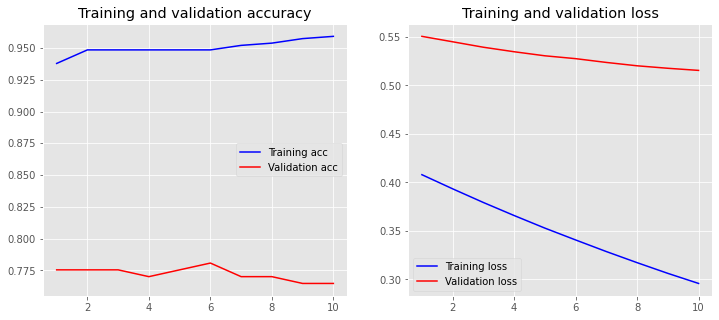

In [218]:
plot_history(history)

In [219]:
loss, accuracy = model.evaluate(x_test_t, y_test, verbose=False)
print("Test set accuracy : ", accuracy)

Test set accuracy :  0.7600000009536744


Okay, so we have something close to but not as good as the classic classifiers. Now we will get the word2vec embeddings. 

Plan

1. Sum the word2vec embeddings for a sentence and feed to LR
2. TFIDF weight sum embeddings and feed to LR
3. Word2Vec embeddings followed by YoonKim CNN solution